# **Assignment 1**
*Submitted by: **Shivank Sharma** - 2018eeb1180*

## **Import the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

## **Exploring Boston Housing Dataset**

In [ ]:
# downloading the Boston Housing Dataset
from sklearn.datasets import load_boston
dataset = load_boston()

print(dataset.data.shape)

(506, 13)


In [ ]:
# dataset description
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# creating a dataframe from dataset
boston = pd.DataFrame(dataset.data, columns=dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## **Task 1**







In [ ]:
# creating dataframes
X = boston
y = pd.DataFrame(dataset.target, columns=['Price'])
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
# splitting the dataset in 70:30 training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# fitting the OLS regressor in training set
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
boston_xtrain = X_train
print('Coefficients: ',clf.coef_)
print('Intercept: ',clf.intercept_)

Coefficients:  [[-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
  -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
   2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
  -4.86738066e-01]]
Intercept:  [37.93710774]


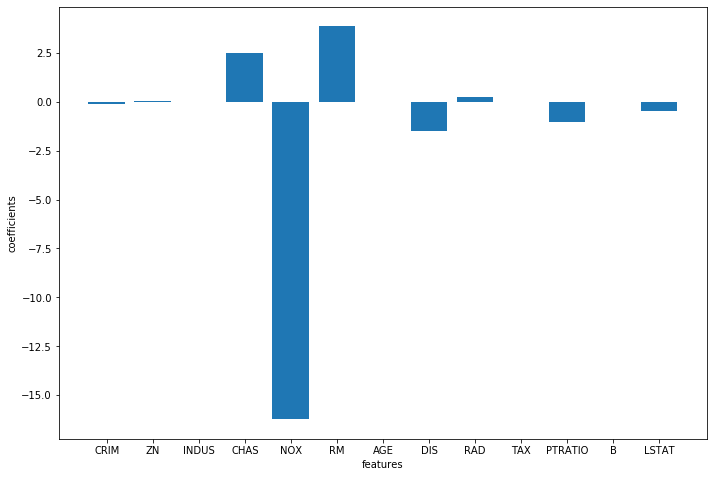

In [ ]:
# plotting the the values of the regression coefficients for the different predictor variables using a bar graph
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
features = dataset.feature_names
coeff = clf.coef_[0]
ax.bar(features, coeff)
ax.set_xlabel('features')
ax.set_ylabel('coefficients')
plt.show()

In [ ]:
# list for training and test errors
OLS_me = [(abs(y_train.to_numpy() - clf.predict(X_train))).mean(), (abs(y_test.to_numpy() - clf.predict(X_test))).mean()]
print(OLS_me)

[3.103606103908007, 3.6099040603818096]


## **Task 2**

In [ ]:
# creating dataframe by dropping the required columns
X = boston.drop(['INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X.head()

,CRIM,ZN,RM,RAD,TAX
0,0.00632,18.0,6.575,1.0,296.0
1,0.02731,0.0,6.421,2.0,242.0
2,0.02729,0.0,7.185,2.0,242.0
3,0.03237,0.0,6.998,3.0,222.0
4,0.06905,0.0,7.147,3.0,222.0


In [ ]:
# creating list for training and test errors
Ridge_me = []

In [ ]:
# fittng the ridge regressor for different values of aplha
coeff = []
for i in range(201):
    ridge = linear_model.Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    Ridge_me.append([i, (abs(y_train.to_numpy() - ridge.predict(X_train))).mean(), (abs(y_test.to_numpy() - ridge.predict(X_test))).mean()])
    coeff.append(ridge.coef_[0])

In [ ]:
# creating an array of length 200
a = np.arange(201)

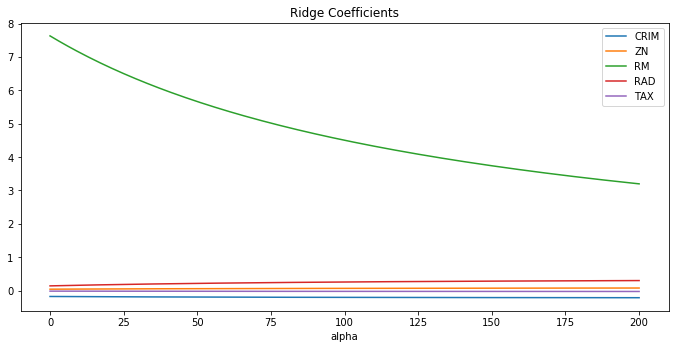

In [ ]:
# plotting the ridge coefficients for different values of alpha
fig = plt.figure()
ax = fig.add_axes([0, 0, 1.5, 1])
ax.plot(a, coeff)
ax.set_xlabel('alpha')
ax.set_title('Ridge Coefficients')
plt.legend(labels=X.columns, loc='best')
plt.show()

## **Task 3**

In [ ]:
# creating list for training and test errors
lasso_me = []

In [ ]:
# fitting the lasso regressor for different values of alpha 
lasso_coeff = []
for i in range(1, 201):
    lasso = linear_model.Lasso(alpha=i)
    lasso.fit(X, y)
    lasso_me.append([i, (abs(y_train.to_numpy() - lasso.predict(X_train))).mean(), (abs(y_test.to_numpy() - lasso.predict(X_test))).mean()])
    lasso_coeff.append(lasso.coef_)

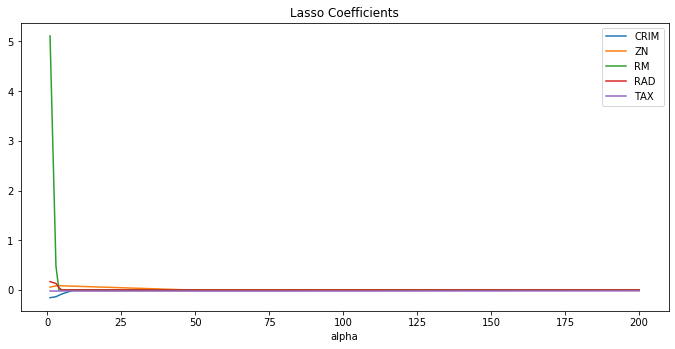

In [ ]:
# plotting the lasso coefficients for different values of aplha
fig = plt.figure()
ax = fig.add_axes([0, 0, 1.5, 1])
ax.plot(a[1:], lasso_coeff)
ax.set_xlabel('alpha')
ax.set_title('Lasso Coefficients')
plt.legend(labels=X.columns, loc='best')
plt.show()

## **Task 4**

### ***Ordinary Least Square Model***

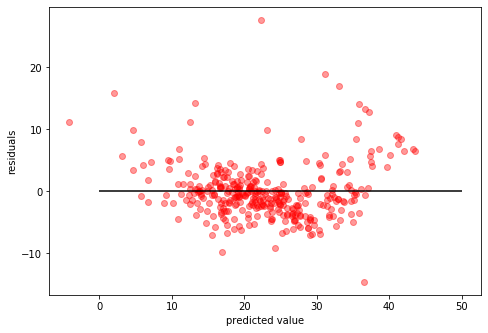

In [ ]:
# plotting the residuals for OLS regressor
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(clf.predict(boston_xtrain), y_train.to_numpy()-clf.predict(boston_xtrain).reshape(354, 1), c='r', alpha=0.4)
ax.hlines(y=0, xmin=0, xmax=50)
ax.set_xlabel('predicted value')
ax.set_ylabel('residuals')
plt.show()

### ***Lasso Model***
*( for alpha = 3, 100, 200 )*

In [ ]:
# fittng lasso regressor for different alpha
lasso1 = linear_model.Lasso(alpha=3)
lasso1.fit(X_train, y_train)
lasso2 = linear_model.Lasso(alpha=100)
lasso2.fit(X_train, y_train)
lasso3 = linear_model.Lasso(alpha=200)
lasso3.fit(X_train, y_train)

Lasso(alpha=200, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

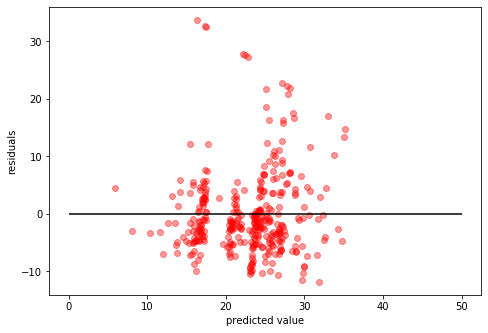

In [ ]:
# plotting the residuals for lasso regressor for aplha=3
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(lasso1.predict(X_train), y_train-lasso1.predict(X_train).reshape(354, 1), c='r', alpha=0.4)
ax.hlines(y=0, xmin=0, xmax=50)
ax.set_xlabel('predicted value')
ax.set_ylabel('residuals')
plt.show()

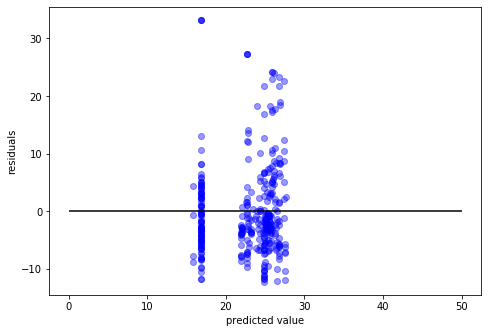

In [ ]:
# plotting the residuals for lasso regressor for aplha=100
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(lasso2.predict(X_train), y_train-lasso2.predict(X_train).reshape(354, 1), c='b', alpha=0.4)
ax.hlines(y=0, xmin=0, xmax=50)
ax.set_xlabel('predicted value')
ax.set_ylabel('residuals')
plt.show()

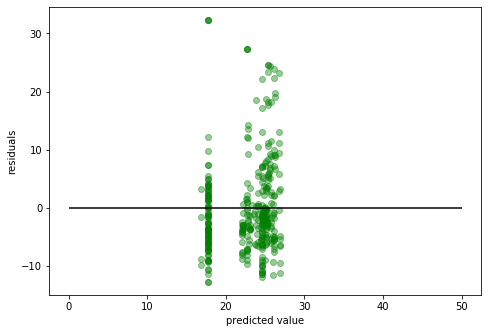

In [ ]:
# plotting the residuals for lasso regressor for aplha=200
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(lasso3.predict(X_train), y_train-lasso3.predict(X_train).reshape(354, 1), c='g', alpha=0.4)
ax.hlines(y=0, xmin=0, xmax=50)
ax.set_xlabel('predicted value')
ax.set_ylabel('residuals')
plt.show()

### ***Ridge Model*** 
*( for alpha = 10, 100, 200 )*

In [ ]:
# fittng ridge regressor for different alpha
ridge1 = linear_model.Ridge(alpha=10)
ridge1.fit(X_train, y_train)
ridge2 = linear_model.Ridge(alpha=100)
ridge2.fit(X_train, y_train)
ridge3 = linear_model.Ridge(alpha=200)
ridge3.fit(X_train, y_train)

Ridge(alpha=200, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

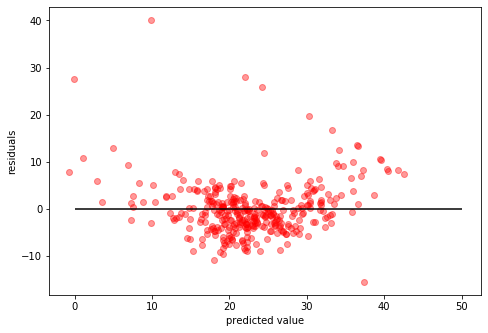

In [ ]:
# plotting the residuals for lasso regressor for aplha=10
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(ridge1.predict(X_train), y_train-ridge1.predict(X_train), c='r', alpha=0.4)
ax.hlines(y=0, xmin=0, xmax=50)
ax.set_xlabel('predicted value')
ax.set_ylabel('residuals')
plt.show()

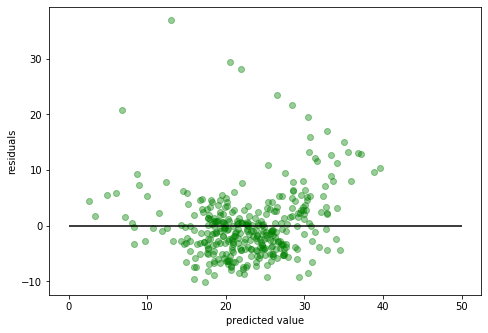

In [ ]:
# plotting the residuals for lasso regressor for aplha=100
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(ridge2.predict(X_train), y_train-ridge2.predict(X_train), c='g', alpha=0.4)
ax.hlines(y=0, xmin=0, xmax=50)
ax.set_xlabel('predicted value')
ax.set_ylabel('residuals')
plt.show()

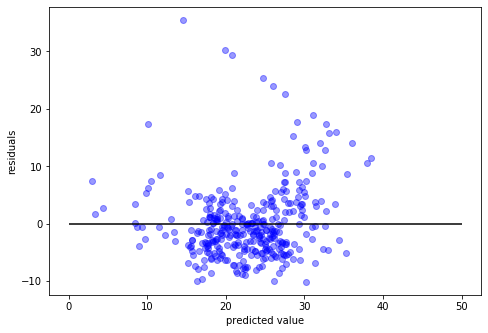

In [ ]:
# plotting the residuals for lasso regressor for aplha=200
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(ridge3.predict(X_train), y_train-ridge3.predict(X_train), c='b', alpha=0.4)
ax.hlines(y=0, xmin=0, xmax=50)
ax.set_xlabel('predicted value')
ax.set_ylabel('residuals')
plt.show()

## **Task 5**

In [ ]:
# creating dataframe for OLS regressor training
# and test errors
OLS_mean_error = pd.DataFrame([OLS_me], columns=['Mean Training Error', 'Mean Test Error'])
OLS_mean_error.head()

,Mean Training Error,Mean Test Error
0,3.103606,3.609904


In [ ]:
# creating dataframe for Ridge regressor trainiing 
# and test errors for different values of alpha(0-200)
Ridge_mean_error = pd.DataFrame(Ridge_me, columns=['Alpha', 'Mean Training Error', 'Mean Test Error'])
Ridge_mean_error.head()

,Alpha,Mean Training Error,Mean Test Error
0,0,3.860241,4.076225
1,1,3.863582,4.076998
2,2,3.866878,4.077760
3,3,3.870259,4.078512
4,4,3.873891,4.079254


In [ ]:
# creating dataframe for lasso regressor trainiing 
# and test errors for different values of alpha (1-200)
lasso_mean_error = pd.DataFrame(lasso_me, columns=['Alpha', 'Mean Training Error', 'Mean Test Error'])
lasso_mean_error.head()

,Alpha,Mean Training Error,Mean Test Error
0,1,8.431312,8.222585
1,2,8.138138,7.914265
2,3,7.999754,7.754720
3,4,7.976540,7.736128
4,5,7.964209,7.724731


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(lasso_mean_error)

     Alpha  Mean Training Error  Mean Test Error
0        1             8.431312         8.222585
1        2             8.138138         7.914265
2        3             7.999754         7.754720
3        4             7.976540         7.736128
4        5             7.964209         7.724731
5        6             7.955170         7.704799
6        7             7.947261         7.686046
7        8             7.940750         7.668649
8        9             7.935735         7.652646
9       10             7.929087         7.645561
10      11             7.922219         7.639577
11      12             7.915429         7.633661
12      13             7.908735         7.627811
13      14             7.902133         7.622042
14      15             7.895630         7.616423
15      16             7.889223         7.610878
16      17             7.882895         7.605384
17      18             7.876673         7.599973
18      19             7.870591         7.594698
19      20          

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(Ridge_mean_error)

     Alpha  Mean Training Error  Mean Test Error
0        0             3.860241         4.076225
1        1             3.863582         4.076998
2        2             3.866878         4.077760
3        3             3.870259         4.078512
4        4             3.873891         4.079254
5        5             3.877607         4.079986
6        6             3.881273         4.080709
7        7             3.884890         4.081450
8        8             3.888460         4.082477
9        9             3.892014         4.083526
10      10             3.895580         4.085027
11      11             3.899100         4.086724
12      12             3.902630         4.088491
13      13             3.906148         4.090235
14      14             3.909652         4.091958
15      15             3.913167         4.094262
16      16             3.916791         4.096923
17      17             3.920448         4.099550
18      18             3.924060         4.102146
19      19          